## K-Nearest Neighbor 알고리즘

- 데이터(아이템 또는 유저로)로부터 거리가 가까운 K개의 다른 데이터를 선택하는 알고리즘

- 데이터와 다른 데이터 사이의 거리를 측정할 때, 'Euclidean distance'등 거리 계산을 한다.

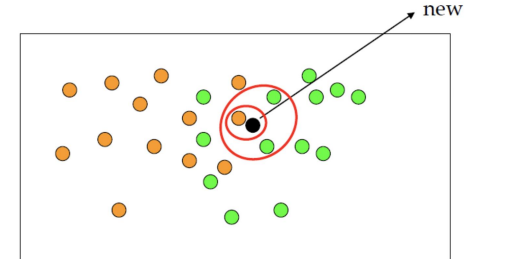

<br>

**k값**

- Model-based Learning이 아닌 Lazy model

- k값과 거리 측정 방법 -> 알고리즘 성능의 가장 중요한 하이퍼파라미터

- k값에 따라 과적합과 underfitting발생

- 개별 데이터 모두를 반영한 지역적 모델 혹은 과도한 정규화로 데이터 label 특성이 반영이 안되는 모델

- k는 과반수를 선택하는 것이므로 홀수로 하는 것이 일반적이다.

<br>

**거리 측정 metric**

- Euclidean Distance: 데이터 A와 B사이의 직선거리를 사용한 지표

- Mahalanobis Distance: 변수의 상관관계 고려한 지표로 변수 내 분산과 변수간 공분산 반영

- Manhattan Distance: 좌표축을 따라 이동한 거리(절대값)을 사용한 지표

<br>

**장점**

- 훈련이 거의 없기 때문에, 빠르게 학습 가능한 알고리즘

- 수치 기반 데이터에서 우수한 성능을 나타내는 알고리즘

- 단순하고 효율적이다.

<br>

**단점**

- 명목 혹은 더미 데이터 처리를 어렵게 한다.

- feature가 많은 데이터는 처리 속도가 느리고 정확도가 많이 떨어진다.

- 적절한 K를 선택하는 것이 어렵다

- 변수를 이해하는 알고리즘이 아니기에 label의 관계 파악등 설명력이 떨어진다.

- 각 변수마다 스케일이 다른 경우 동일한 거리 척도를 사용하기 어렵다.

<br>

**k-NN구현을 위해 고려해야할 부분**

- 변수간의 분포가 다르기에 데이터 정규화를 해야한다.

   - Z-score, Min-Max, Normalization

- 데이터 간의 거리 측정 효율화

   - Locality Sensitive Hashing, Network  based Indexer등

- 공간 상에서 데이터의 representation상태 확인

   - 다른 모델에 비해 이상치에 robus하지만 전체적으로 데이터가 주어진 공간에 특성에 따라서 위치와 거리가 적절히 분포되어야 한다.

### 회귀의 K-NN 알고리즘

- 객체의 특성 값이며, 이 값은 K개의 nearest neighbor값들의 평균



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors

np.random.seed(0)
X = np.sort(5*np.random.rand(40,1), axis=0)
T = np.linspace(0,5,500)[:, np.newaxis]
y = np.sin(X).ravel()

#Add noise to targets

y[::5] += 1 *(0.5-np.random.rand(8))

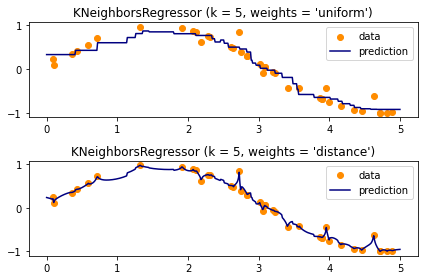

In [ ]:
n_neighbors = 5

for i, weights in enumerate(['uniform','distance']):
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights = weights)
    y_ = knn.fit(X,y).predict(T)

    plt.subplot(2,1,i+1)
    plt.scatter(X,y,color='darkorange', label='data')
    plt.plot(T,y_, color='navy', label='prediction')
    plt.axis('tight')
    plt.legend()
    plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors, weights))

plt.tight_layout()
plt.show()

### 분류의 knn알고리즘

- 소속된 항목(label)을 출력하여, k개의 nearest neighbor 중 과반수로 분류


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import DecisionBoundaryDisplay

n_neighbors = 15

# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

# Create color maps
cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
cmap_bold = ["darkorange", "c", "darkblue"]

for weights in ["uniform", "distance"]:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    _, ax = plt.subplots()
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        cmap=cmap_light,
        ax=ax,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
        shading="auto",
    )

    # Plot also the training points
    sns.scatterplot(
        x=X[:, 0],
        y=X[:, 1],
        hue=iris.target_names[y],
        palette=cmap_bold,
        alpha=1.0,
        edgecolor="black",
    )
    plt.title(
        "3-Class classification (k = %i, weights = '%s')" % (n_neighbors, weights)
    )

plt.show()